In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt 

In [3]:
datasets = pd.read_csv('train.csv')

In [4]:
datasets.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


# Data Preprocessing

In [5]:
datasets.shape

(1000, 12)

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

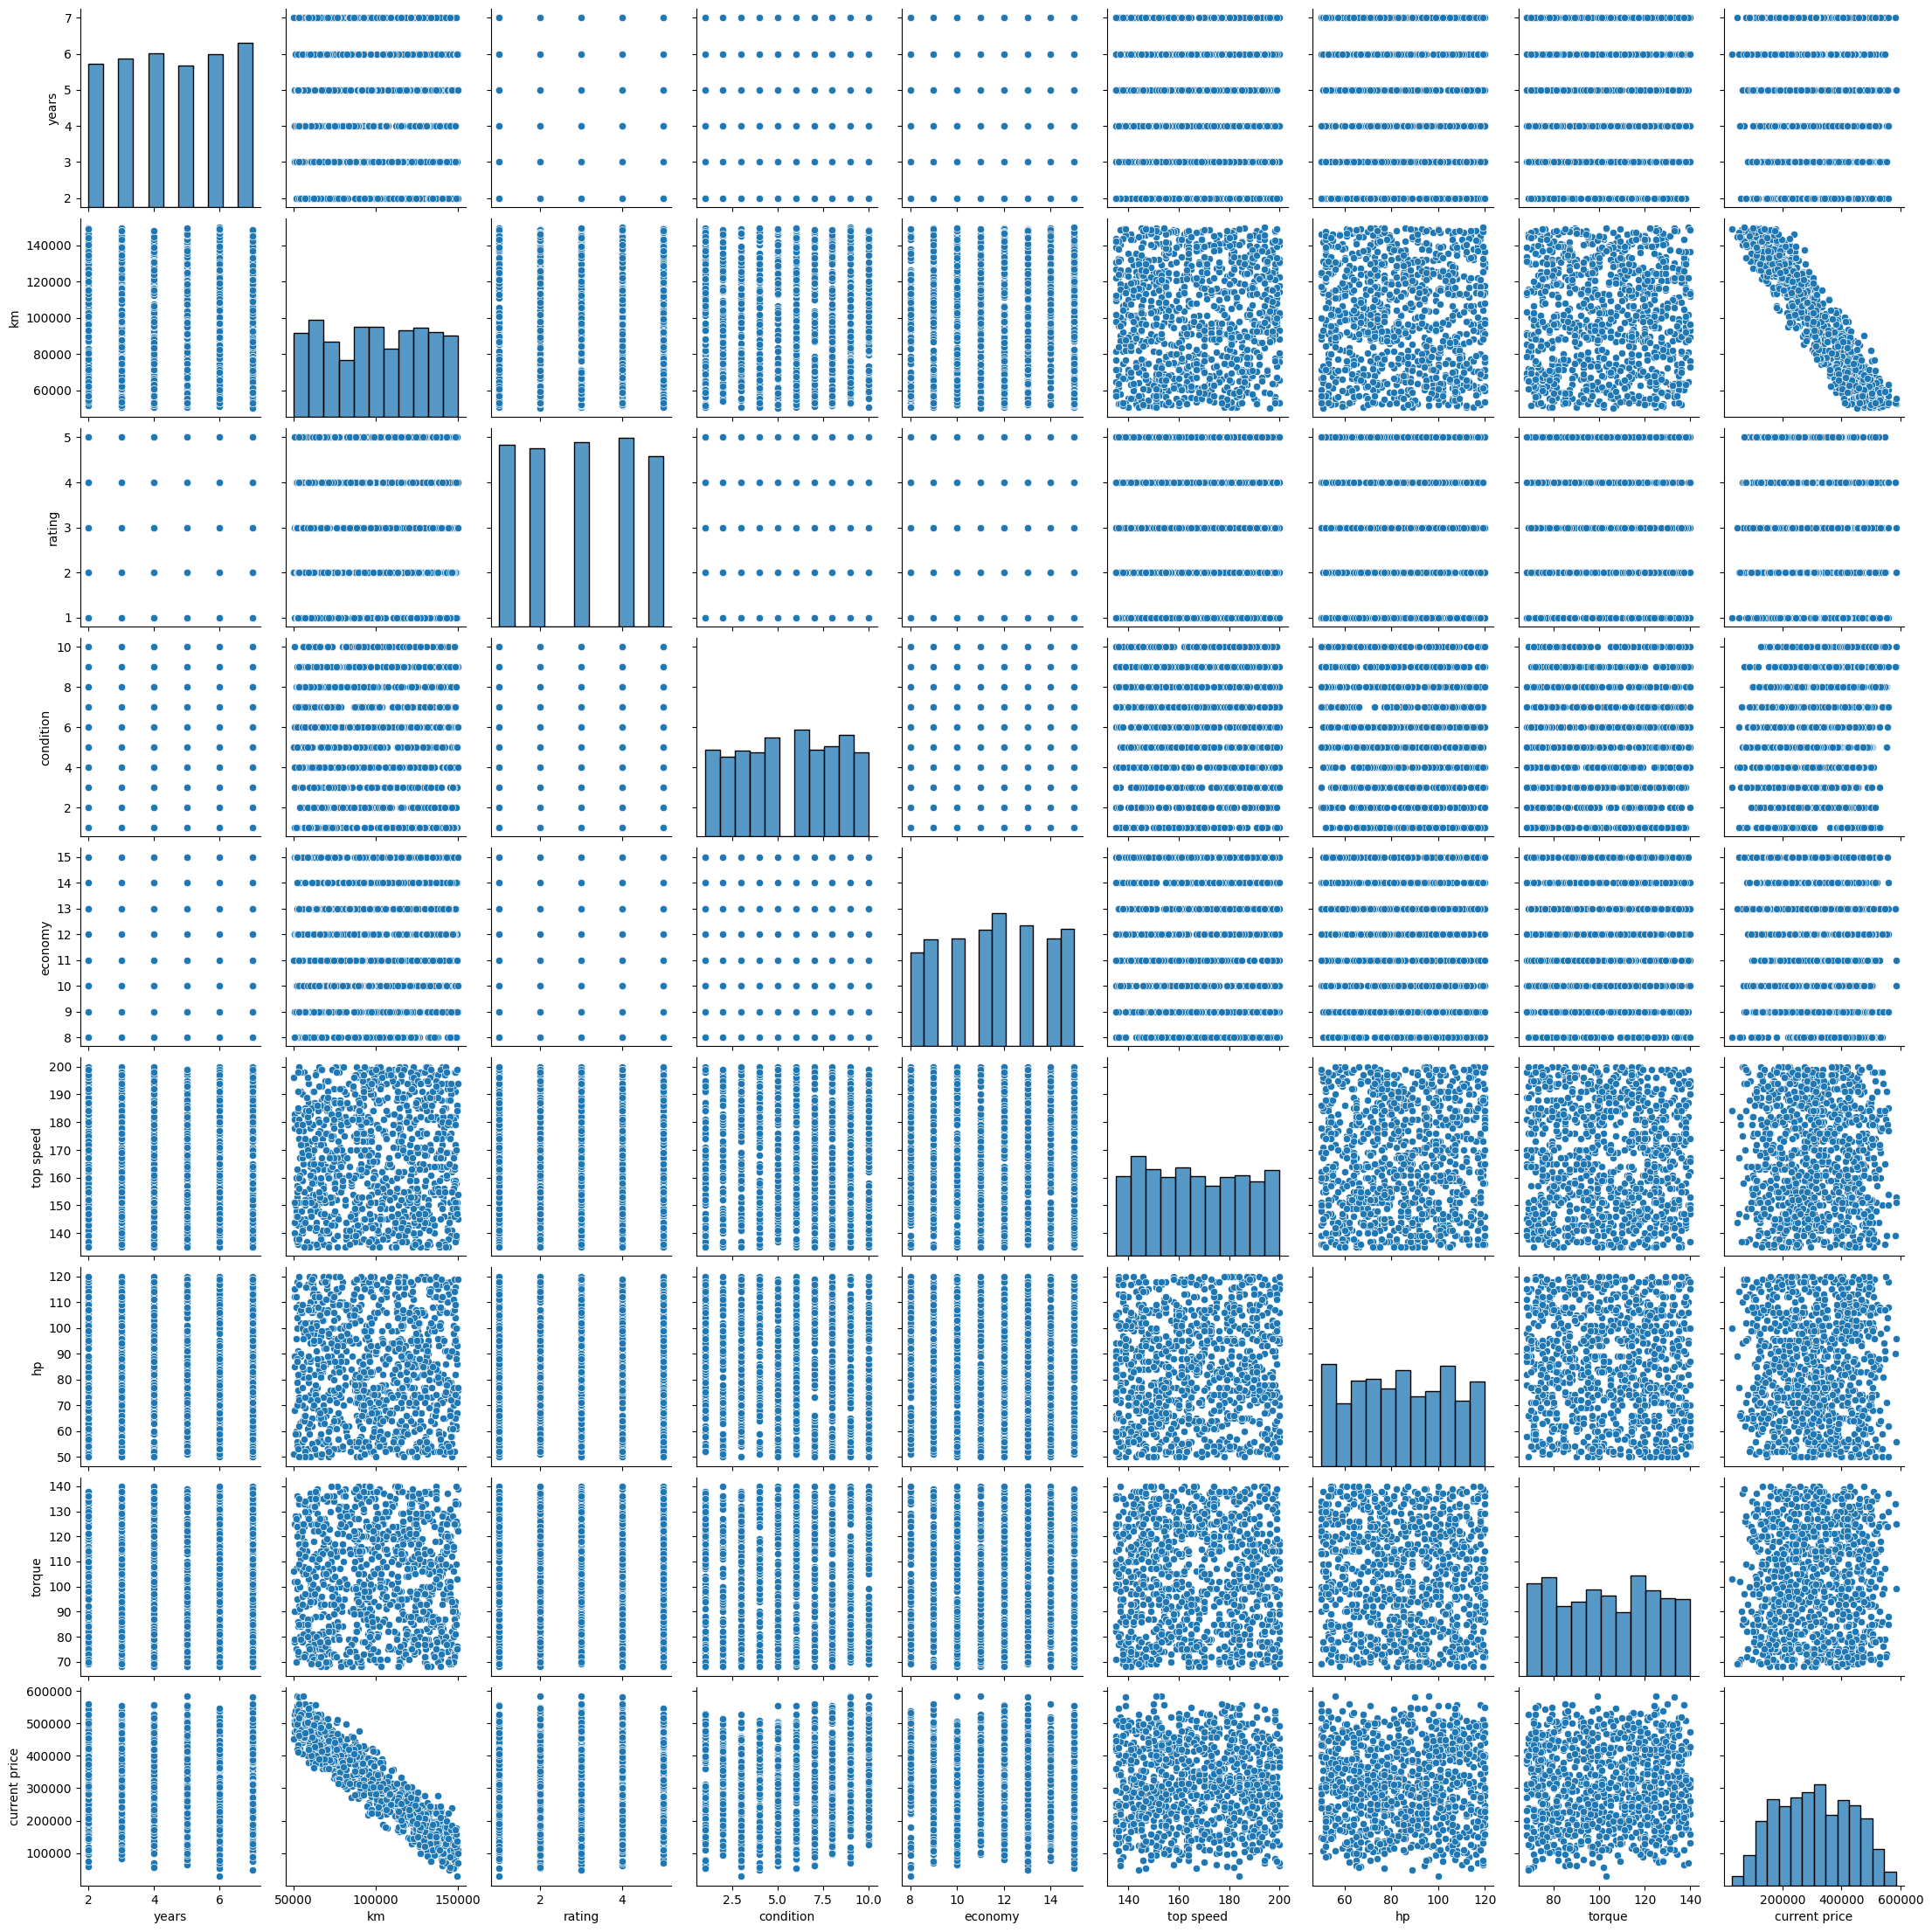

In [6]:
sns.pairplot(datasets[['years','km','rating','condition','economy','top speed','hp','torque','current price']])

In [7]:
tensor_data = tf.constant(datasets)
tensor_data = tf.cast(tensor_data,tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [8]:

print(tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[9.640000e+02 5.795050e+05 7.711660e+05 5.000000e+00 6.291800e+04
  4.000000e+00 6.000000e+00 1.000000e+01 1.740000e+02 1.120000e+02
  1.320000e+02 4.267600e+05]
 [4.740000e+02 6.474220e+05 7.507740e+05 2.000000e+00 1.322150e+05
  3.000000e+00 7.000000e+00 1.200000e+01 1.370000e+02 1.000000e+02
  1.080000e+02 1.789915e+05]
 [5.760000e+02 5.939810e+05 8.405260e+05 4.000000e+00 6.575600e+04
  3.000000e+00 3.000000e+00 9.000000e+00 2.000000e+02 6.600000e+01
  6.900000e+01 4.541685e+05]
 [2.940000e+02 5.095800e+05 7.688830e+05 4.000000e+00 1.231400e+05
  5.000000e+00 9.000000e+00 1.500000e+01 1.620000e+02 6.000000e+01
  7.900000e+01 1.775095e+05]
 [5.450000e+02 5.997750e+05 7.808030e+05 4.000000e+00 8.942100e+04
  4.000000e+00 9.000000e+00 1.300000e+01 1.880000e+02 5.500000e+01
  8.300000e+01 3.623770e+05]], shape=(5, 12), dtype=float32)


In [10]:
x= tensor_data[:,3:-1]
print(x.shape)
print(x[:5])

(1000, 8)
tf.Tensor(
[[5.00000e+00 6.29180e+04 4.00000e+00 6.00000e+00 1.00000e+01 1.74000e+02
  1.12000e+02 1.32000e+02]
 [2.00000e+00 1.32215e+05 3.00000e+00 7.00000e+00 1.20000e+01 1.37000e+02
  1.00000e+02 1.08000e+02]
 [4.00000e+00 6.57560e+04 3.00000e+00 3.00000e+00 9.00000e+00 2.00000e+02
  6.60000e+01 6.90000e+01]
 [4.00000e+00 1.23140e+05 5.00000e+00 9.00000e+00 1.50000e+01 1.62000e+02
  6.00000e+01 7.90000e+01]
 [4.00000e+00 8.94210e+04 4.00000e+00 9.00000e+00 1.30000e+01 1.88000e+02
  5.50000e+01 8.30000e+01]], shape=(5, 8), dtype=float32)


In [11]:
y = tensor_data[:,-1]
print(y.shape)
print(y[:5])
y = tf.expand_dims(y , axis = -1)
print(y[:5])



(1000,)
tf.Tensor([426760.  178991.5 454168.5 177509.5 362377. ], shape=(5,), dtype=float32)
tf.Tensor(
[[426760. ]
 [178991.5]
 [454168.5]
 [177509.5]
 [362377. ]], shape=(5, 1), dtype=float32)


In [12]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)

In [13]:
x_train = x[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [41]:
x_val = x[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (VAL_RATIO + TRAIN_RATIO))]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO):int(DATASET_SIZE * (VAL_RATIO + TRAIN_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [42]:
x_test = x[int(DATASET_SIZE *(TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE *(TRAIN_RATIO + VAL_RATIO) ):]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


# Normalization

Formula = (x-mean)/standard_deviation, 
std = sqrt(variance)

In [43]:
normalizer = Normalization( axis = -1 ,mean = 5, variance = 5)
x_normalized = tf.constant([[2,3,4,5],
                            [0,9,6,7]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-1.3416407, -0.8944272, -0.4472136,  0.       ],
       [-2.236068 ,  1.7888544,  0.4472136,  0.8944272]], dtype=float32)>

In [44]:
normalizer = Normalization()
x_normalized = tf.constant([[2,3,4,5],
                            [0,9,6,7]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[ 1., -1., -1., -1.],
       [-1.,  1.,  1.,  1.]], dtype=float32)>

In [45]:
print(x.shape)

(1000, 8)


In [87]:
normalizer = Normalization()
normalizer.adapt(x)
normalizer(x)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 0.25549653, -1.2821447 ,  0.72177964, ...,  0.36864513,
         1.3387843 ,  1.3576949 ],
       [-1.4904968 ,  1.0962629 ,  0.00855854, ..., -1.5505683 ,
         0.75360906,  0.21745397],
       [-0.32650122, -1.184739  ,  0.00855854, ...,  1.7172817 ,
        -0.9043875 , -1.6354375 ],
       ...,
       [-0.32650122, -1.3793443 ,  1.4350008 , ...,  0.05742131,
         1.0949613 , -0.40017653],
       [-1.4904968 ,  1.6948032 ,  0.72177964, ..., -1.1356033 ,
        -0.41674143,  1.4052049 ],
       [-1.4904968 , -0.43291685, -1.4178838 , ..., -0.87625015,
         1.0949613 , -1.017807  ]], dtype=float32)>

In [71]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(32,activation="relu"),
    Dense(32,activation="relu"),
    Dense(32,activation="relu"),
    Dense(1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 32)                288       
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2450 (9.57 KB)
Trainable params: 2433 (9.50 KB)
Non-trainable params: 17 (72.00 Byte)
____________________

Error Sanction

In [72]:
model.compile(optimizer = Adam(),
    loss=MeanAbsoluteError(),
    metrics = RootMeanSquaredError())

In [73]:
history=model.fit(x_train,y_train, validation_data =(x_val,y_val), epochs = 100, verbose = 1)

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 309686.1250 - root_mean_squared_error: 334167.0938 - val_loss: 306103.3750 - val_root_mean_squared_error: 332102.1250
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 309683.4688 - root_mean_squared_error: 334164.6250 - val_loss: 306099.0938 - val_root_mean_squared_error: 332098.0625
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 309676.1562 - root_mean_squared_error: 334157.7188 - val_loss: 306087.6562 - val_root_mean_squared_error: 332087.4375
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 309657.8750 - root_mean_squared_error: 334140.4688 - val_loss: 306059.9062 - val_root_mean_squared_error: 332061.6562
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 309615.8438 - root_mean_squared_error: 334101.5000 - val_loss: 306000.0625 - val_root_mean_squared_error: 332005.9062
Epoch 6/100
25/25 [=========================

Epoch 44/100
25/25 [==============================] - 0s 4ms/step - loss: 45344.8711 - root_mean_squared_error: 56334.7383 - val_loss: 41816.0742 - val_root_mean_squared_error: 53991.3711
Epoch 45/100
25/25 [==============================] - 0s 4ms/step - loss: 44239.1992 - root_mean_squared_error: 55006.8945 - val_loss: 41276.0312 - val_root_mean_squared_error: 53156.2422
Epoch 46/100
25/25 [==============================] - 0s 4ms/step - loss: 43337.2656 - root_mean_squared_error: 53967.1797 - val_loss: 41021.4141 - val_root_mean_squared_error: 52514.4648
Epoch 47/100
25/25 [==============================] - 0s 4ms/step - loss: 42611.5195 - root_mean_squared_error: 53051.3203 - val_loss: 40802.1836 - val_root_mean_squared_error: 51929.7656
Epoch 48/100
25/25 [==============================] - 0s 4ms/step - loss: 41990.4062 - root_mean_squared_error: 52322.2695 - val_loss: 40831.9062 - val_root_mean_squared_error: 51673.4766
Epoch 49/100
25/25 [==============================] - 0s 5ms

25/25 [==============================] - 0s 4ms/step - loss: 37519.5469 - root_mean_squared_error: 46878.0078 - val_loss: 39595.4492 - val_root_mean_squared_error: 49140.0078
Epoch 88/100
25/25 [==============================] - 0s 5ms/step - loss: 37526.3164 - root_mean_squared_error: 46892.0625 - val_loss: 39631.2383 - val_root_mean_squared_error: 49224.5781
Epoch 89/100
25/25 [==============================] - 0s 4ms/step - loss: 37437.8281 - root_mean_squared_error: 46771.3867 - val_loss: 39591.0547 - val_root_mean_squared_error: 49111.1836
Epoch 90/100
25/25 [==============================] - 0s 4ms/step - loss: 37398.8516 - root_mean_squared_error: 46725.6328 - val_loss: 39449.6016 - val_root_mean_squared_error: 49015.8750
Epoch 91/100
25/25 [==============================] - 0s 4ms/step - loss: 37372.3320 - root_mean_squared_error: 46682.6367 - val_loss: 39507.9414 - val_root_mean_squared_error: 49064.6094
Epoch 92/100
25/25 [==============================] - 0s 4ms/step - loss:

In [74]:
history.history

{'loss': [309686.125,
  309683.46875,
  309676.15625,
  309657.875,
  309615.84375,
  309529.3125,
  309369.4375,
  309097.46875,
  308671.125,
  308036.90625,
  307131.8125,
  305891.34375,
  304241.53125,
  302099.1875,
  299372.875,
  295979.59375,
  291829.59375,
  286790.96875,
  280814.875,
  273771.0625,
  265529.4375,
  256007.59375,
  245170.953125,
  233123.0,
  219860.875,
  205739.359375,
  191190.84375,
  175821.265625,
  160464.125,
  145411.359375,
  130507.4921875,
  116349.8203125,
  102531.53125,
  90056.5,
  79593.1484375,
  70609.640625,
  63907.296875,
  58940.14453125,
  55307.11328125,
  52475.75,
  50119.5546875,
  48251.10546875,
  46663.4765625,
  45344.87109375,
  44239.19921875,
  43337.265625,
  42611.51953125,
  41990.40625,
  41538.78515625,
  41111.1171875,
  40794.7890625,
  40491.71875,
  40275.66796875,
  40083.421875,
  39907.890625,
  39672.953125,
  39551.82421875,
  39423.8046875,
  39372.9453125,
  39223.51953125,
  39154.07421875,
  39053.46875,

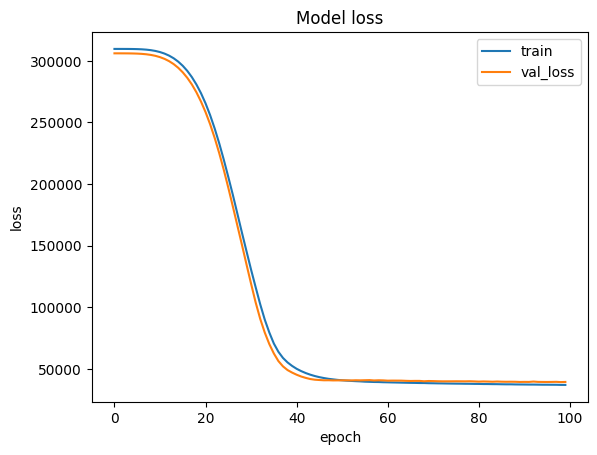

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

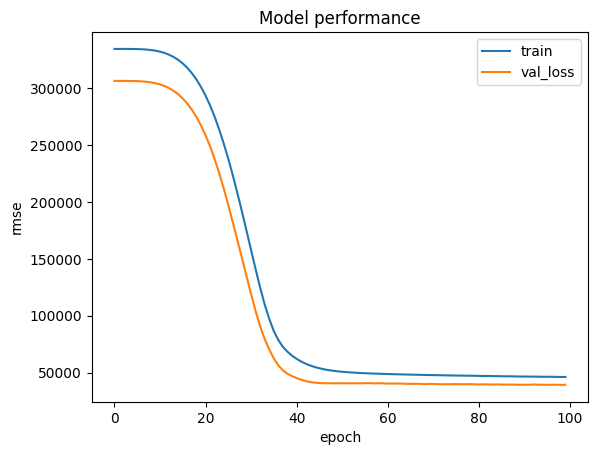

In [76]:
plt.plot(history.history['root_mean_squared_error'])
plt.title('Model performance')
plt.plot(history.history['val_loss'])
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

In [77]:
model.evaluate(x_val,y_val)

4/4 [==============================] - 0s 3ms/step - loss: 39458.5469 - root_mean_squared_error: 49016.5078


[39458.546875, 49016.5078125]

In [78]:
print(x.shape)

(1000, 8)


# Testing

In [79]:
x_test[0].shape


TensorShape([8])

In [80]:
model.predict(x_test[0]).shape

1/1 [==============================] - 0s 117ms/step


(1, 1)

In [81]:
model.predict(tf.expand_dims(x_test[0],axis=0))

1/1 [==============================] - 0s 109ms/step


array([[181966.1]], dtype=float32)

In [82]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([74398.], dtype=float32)>

In [83]:
y_true = list(y_test[:,0].numpy())

In [84]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[181966.1, 272327.12, 482819.53, 360768.56, 243333.77, 190327.84, 147288.17, 177800.03, 390743.4, 261834.66, 300688.16, 446310.47, 212237.34, 301301.94, 532135.2, 483787.4, 108022.28, 138304.38, 352557.34, 240327.5, 161088.67, 299869.22, 304199.53, 216263.47, 211734.67, 353503.53, 328060.38, 439592.8, 290368.25, 198458.44, 388825.44, 252310.75, 480859.66, 527069.3, 243116.2, 216306.17, 221610.88, 336370.34, 407955.75, 484041.7, 400559.4, 242244.23, 161471.8, 494288.88, 170757.2, 480563.34, 160676.48, 271218.62, 137595.0, 288279.78, 282819.75, 443395.75, 186776.28, 453107.78, 317683.53, 241093.44, 353748.62, 193096.08, 130432.77, 144348.3, 383180.9, 277368.53, 372452.7, 148726.69, 169726.34, 246035.64, 334379.44, 167186.38, 198581.38, 248271.88, 261288.88, 299537.03, 503626.53, 202555.78, 193254.4, 479059.38, 541728.1, 467081.8, 275296.84, 513454.9, 279714.28, 114349.82, 196960.86, 217205.44, 218709.14, 293900.03, 345826.9, 201968.55, 1

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


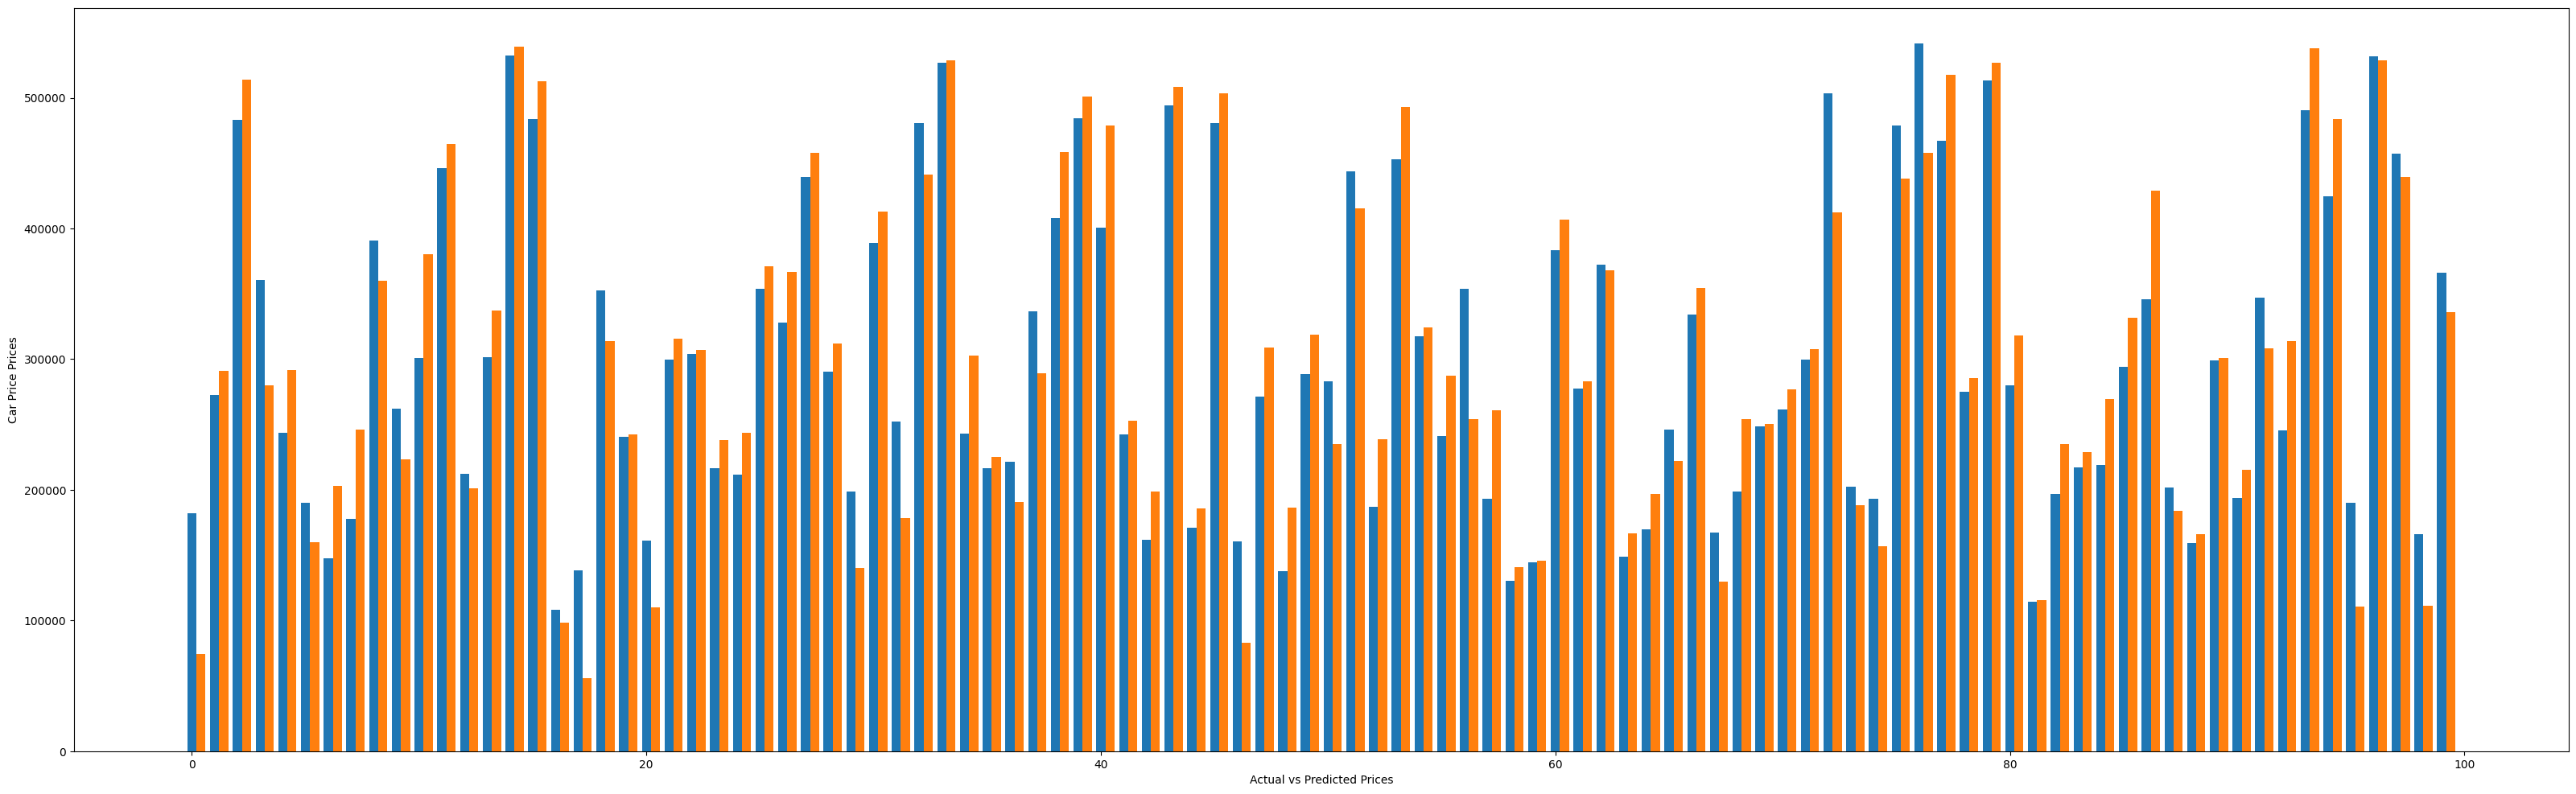

In [85]:
import numpy as np
ind = np.arange(100)
print(ind)
plt.figure(figsize=(40,12))
width = 0.4

plt.bar(ind,y_pred,width,label="Predicted Car Price")
plt.bar(ind + width,y_true, width, label="Actual Car Price")

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')
plt.show()